# Harikrishnan U S
# R7B - 365

Epoch 1/5
938/938 [==============================] - 27s 25ms/step - loss: 0.1839 - accuracy: 0.9435 - val_loss: 0.0488 - val_accuracy: 0.9849
Epoch 2/5
938/938 [==============================] - 23s 25ms/step - loss: 0.0514 - accuracy: 0.9845 - val_loss: 0.0387 - val_accuracy: 0.9886
Epoch 3/5
938/938 [==============================] - 22s 24ms/step - loss: 0.0357 - accuracy: 0.9890 - val_loss: 0.0406 - val_accuracy: 0.9874
Epoch 4/5
938/938 [==============================] - 23s 24ms/step - loss: 0.0279 - accuracy: 0.9913 - val_loss: 0.0345 - val_accuracy: 0.9889
Epoch 5/5
313/313 [==============================] - 2s 6ms/step - loss: 0.0349 - accuracy: 0.9886
Test Loss: 0.034931086003780365
Test Accuracy: 0.9886000156402588


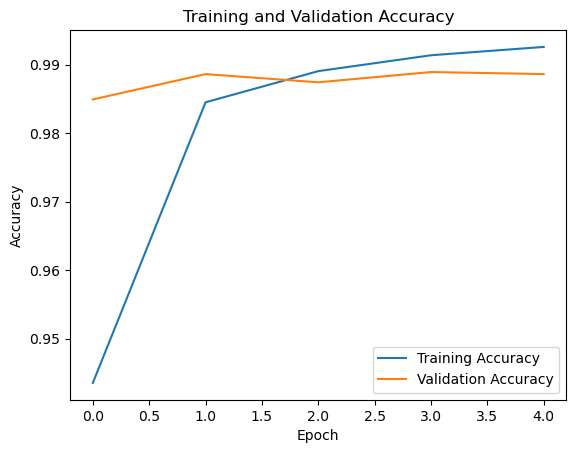

In [6]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() 
train_images = train_images.reshape((60000, 28, 28, 1)) 
test_images = test_images.reshape((10000, 28, 28, 1)) 
train_images = train_images.astype('float32') / 255 
test_images = test_images.astype('float32') / 255 
train_labels = to_categorical(train_labels) 
test_labels = to_categorical(test_labels) 

# Create the CNN model
model = models.Sequential() 
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax')) 

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, 
                    validation_data=(test_images, test_labels), epochs=5, 
                    batch_size=64)

# Evaluate the model
loss, accuracy = model.evaluate(test_images, test_labels)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

313/313 [==============================] - 3s 6ms/step


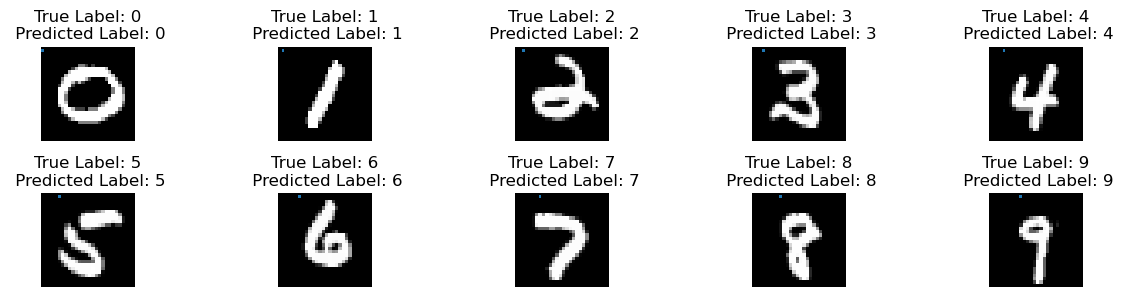

In [7]:
import random

predictions = model.predict(test_images) 
start_index = random.randint(0, len(test_images) - 11) 
num_images = 10 
class_names = [str(i) for i in range(10)] 
num_cols = 2 
num_rows = (num_images + num_cols - 1) // num_cols 

plt.figure(figsize=(12, 6)) 
for i in range(num_images): 
    plt.subplot(4, 5, i + 1) 
    plt.imshow(test_images[start_index + i], cmap='gray') 
    plt.axis('off') 
    predicted_probabilities = predictions[start_index + i] 
    true_label = np.argmax(test_labels[start_index + i]) 
    predicted_label = np.argmax(predicted_probabilities)
    plt.bar(range(10), predicted_probabilities, tick_label=class_names) 
    plt.xlabel('Class') 
    plt.ylabel('Probability') 
    plt.title(f'True Label: {true_label}\n Predicted Label: {predicted_label}')
plt.tight_layout() 
plt.show() 

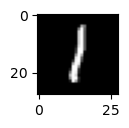

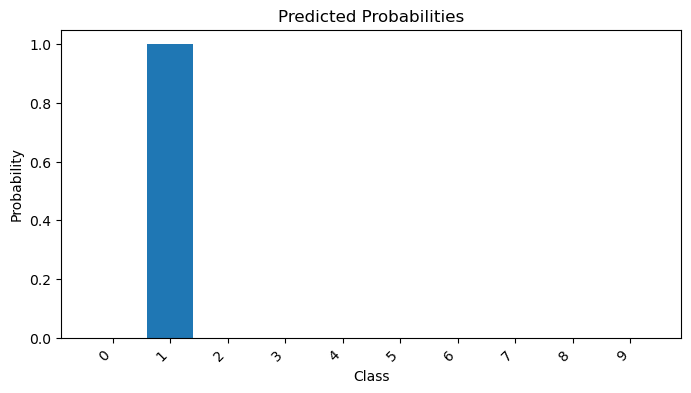

In [9]:
image_index=random.randint(0, len(test_images) - 1) 
predicted_probabilities = predictions[image_index] 
true_label = np.argmax(test_labels[image_index]) 
class_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"] 
class_indices = list(range(10)) 
plt.subplot(4, 5, i + 1) 
plt.imshow(test_images[image_index], cmap='gray') 
plt.figure(figsize=(8, 4)) 
plt.bar(class_indices, predicted_probabilities) 
plt.xticks(class_indices, class_names, rotation=45, ha='right') 
plt.xlabel('Class') 
plt.ylabel('Probability') 
plt.title(f'Predicted Probabilities') 
plt.show() 